In [1]:
from pythtb import TBModel, Lattice
import matplotlib.pyplot as plt

In [2]:
# define 3D real-space lattice vectors
lat_vecs = [[1, 0, 0], [0, 1.25, 0], [0, 0, 3]]
# define coordinates of orbitals in reduced units
orb_vecs = [[0, 0, -0.15], [0.5, 0.5, 0.15]]

# only first two lattice vectors repeat, so k-space is 2D
lat = Lattice(lat_vecs, orb_vecs, periodic_dirs=[0, 1])

my_model = TBModel(lat)

delta = 1.1
t = 0.6

# set on-site energies
my_model.set_onsite([-delta, delta])
# set hoppings (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 1, 0, [0, 0, 0])
my_model.set_hop(t, 1, 0, [1, 0, 0])
my_model.set_hop(t, 1, 0, [0, 1, 0])
my_model.set_hop(t, 1, 0, [1, 1, 0])

print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 3
k-space dimension           = 2
periodic directions         = [0, 1]
spinful                     = False
number of spin components   = 1
number of electronic states = 2
number of orbitals          = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000,  0.000,  0.000]
  # 1 ===> [ 0.000,  1.250,  0.000]
  # 2 ===> [ 0.000,  0.000,  3.000]
Volume of unit cell (Cartesian) = 3.750 [A^d]

Reciprocal lattice vectors (Cartesian):
  # 0 ===> [ 6.283,  0.000,  0.000]
  # 1 ===> [ 0.000,  5.027,  0.000]
Volume of reciprocal unit cell = 31.583 [A^-d]

Orbital vectors (Cartesian):
  # 0 ===> [ 0.000,  0.000, -0.450]
  # 1 ===> [ 0.500,  0.625,  0.450]

Orbital vectors (fractional):
  # 0 ===> [ 0.000,  0.000, -0.150]
  # 1 ===> [ 0.500,  0.500,  0.150]
----------------------------------------
Site energies:
  < 0 | H | 0 > = -1.100 
  < 1 | H | 1

In [3]:
my_model.visualize_3d()

In [4]:
path = [[0.0, 0.0], [0.0, 0.5], [0.5, 0.5], [0.0, 0.0]]
# specify labels for these nodal points
label = (r"$\Gamma $", r"$X$", r"$M$", r"$\Gamma $")

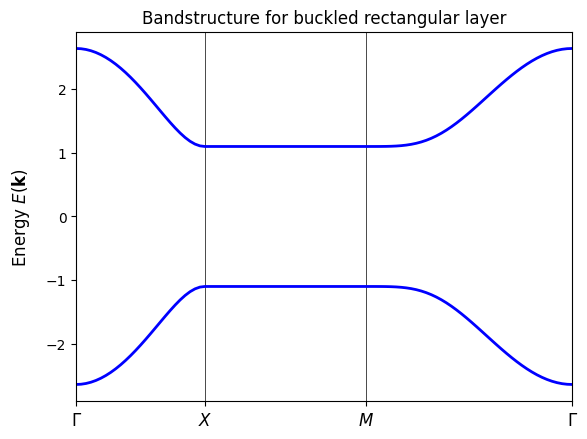

In [5]:
fig, ax = my_model.plot_bands(k_nodes=path, k_node_labels=label, nk=100)
ax.set_title("Bandstructure for buckled rectangular layer")
plt.show()

In [6]:
(k_vec, k_dist, k_node) = my_model.k_path(path, 81)

In [7]:
evals = my_model.solve_ham(k_vec)

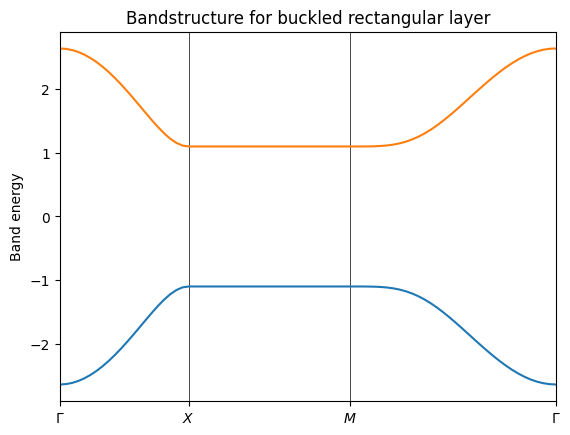

In [8]:
fig, ax = plt.subplots()
ax.set_title("Bandstructure for buckled rectangular layer")
ax.set_ylabel("Band energy")

# specify horizontal axis details
ax.set_xlim(k_node[0], k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color="k")

ax.plot(k_dist, evals)
plt.show()